In [130]:
pip install ucimlrepo

In [131]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [133]:
print(f'row information: {X.index}')
print(f'col information: {X.columns}')

row information: RangeIndex(start=0, stop=6497, step=1)
col information: Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [134]:
whitewine_df=pd.read_csv('/content/winequality-white.csv', sep=';')
whitewine_df.head(15)
whitewine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [135]:
correlation_matrix = whitewine_df.corr()
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

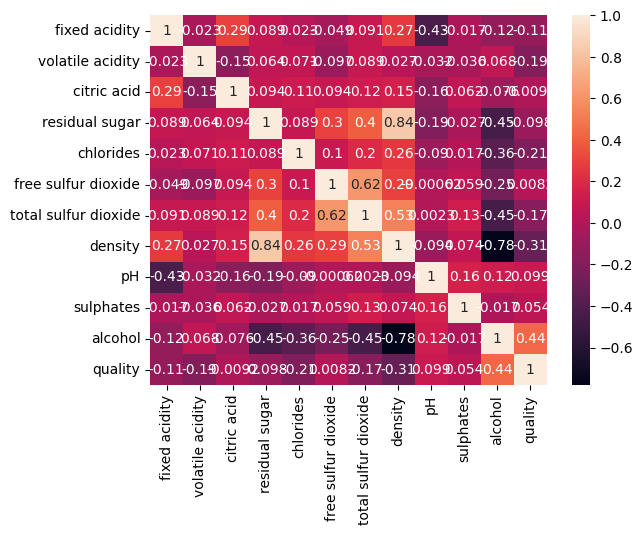

In [136]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

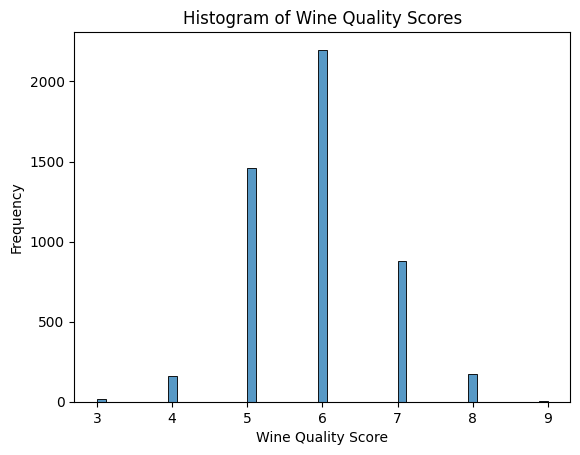

In [137]:
quality_df=whitewine_df['quality']
sns.histplot(quality_df)
plt.xlabel('Wine Quality Score')
plt.ylabel('Frequency')
plt.title('Histogram of Wine Quality Scores')
plt.show()

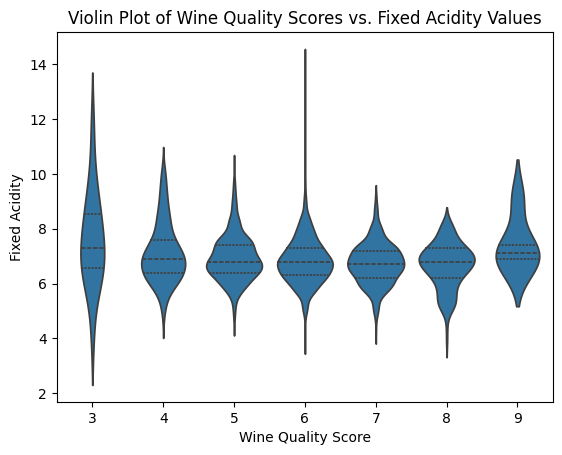

In [138]:
sns.violinplot(data=whitewine_df, x='quality', y='fixed acidity', inner='quart')
plt.xlabel('Wine Quality Score')
plt.ylabel('Fixed Acidity')
plt.title('Violin Plot of Wine Quality Scores vs. Fixed Acidity Values')

plt.show()

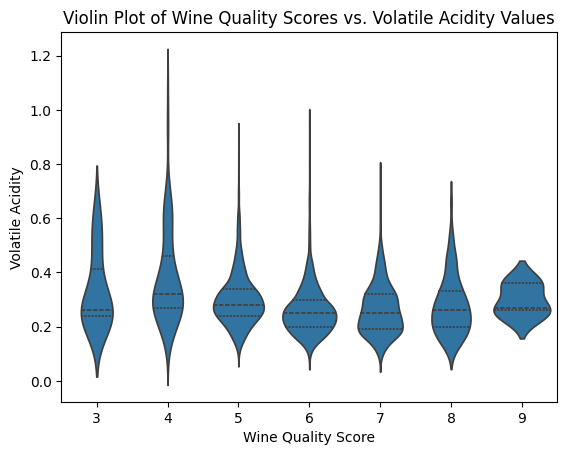

In [139]:
sns.violinplot(data=whitewine_df, x='quality', y='volatile acidity', inner='quart')
plt.xlabel('Wine Quality Score')
plt.ylabel('Volatile Acidity')
plt.title('Violin Plot of Wine Quality Scores vs. Volatile Acidity Values')

plt.show()

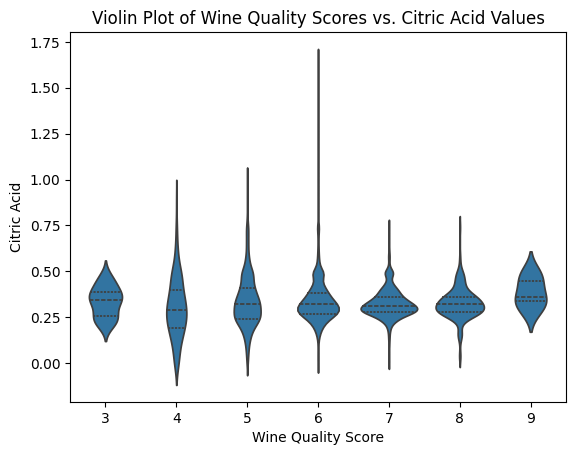

In [140]:
sns.violinplot(data=whitewine_df, x='quality', y='citric acid', inner='quart')
plt.xlabel('Wine Quality Score')
plt.ylabel('Citric Acid')
plt.title('Violin Plot of Wine Quality Scores vs. Citric Acid Values')

plt.show()

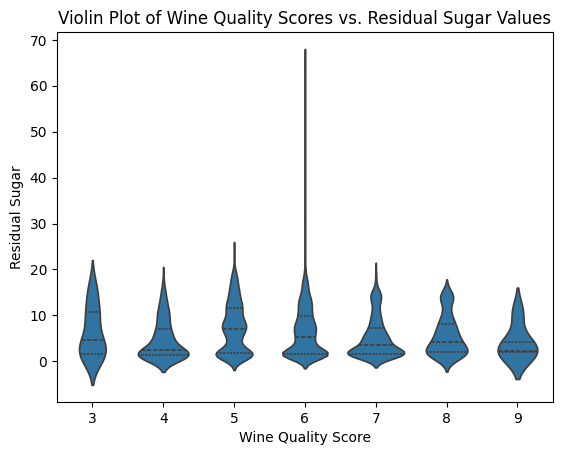

In [141]:
sns.violinplot(data=whitewine_df, x='quality', y='residual sugar', inner='quart')
plt.xlabel('Wine Quality Score')
plt.ylabel('Residual Sugar')
plt.title('Violin Plot of Wine Quality Scores vs. Residual Sugar Values')

plt.show()

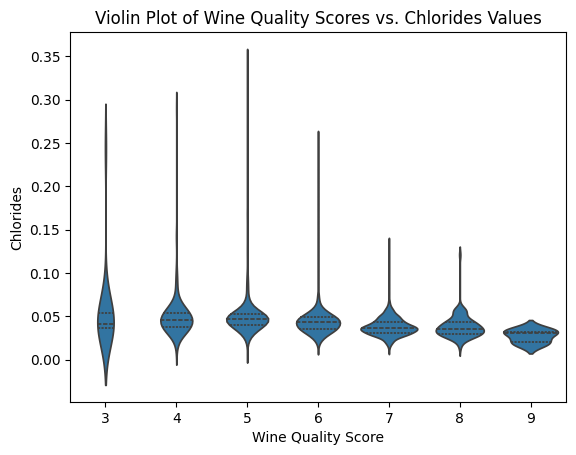

In [142]:
sns.violinplot(data=whitewine_df, x='quality', y='chlorides', inner='quart')
plt.xlabel('Wine Quality Score')
plt.ylabel('Chlorides')
plt.title('Violin Plot of Wine Quality Scores vs. Chlorides Values')

plt.show()

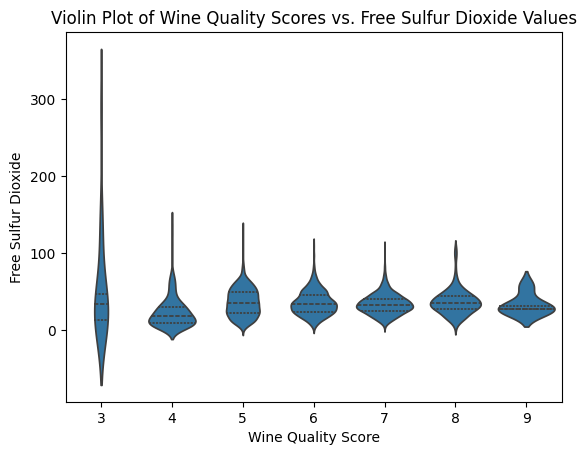

In [143]:
sns.violinplot(data=whitewine_df, x='quality', y='free sulfur dioxide', inner='quart')
plt.xlabel('Wine Quality Score')
plt.ylabel('Free Sulfur Dioxide')
plt.title('Violin Plot of Wine Quality Scores vs. Free Sulfur Dioxide Values')

plt.show()

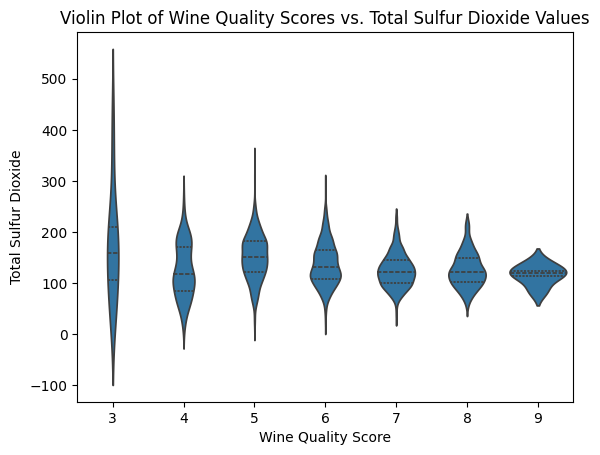

In [144]:
sns.violinplot(data=whitewine_df, x='quality', y='total sulfur dioxide', inner='quart')
plt.xlabel('Wine Quality Score')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Violin Plot of Wine Quality Scores vs. Total Sulfur Dioxide Values')

plt.show()

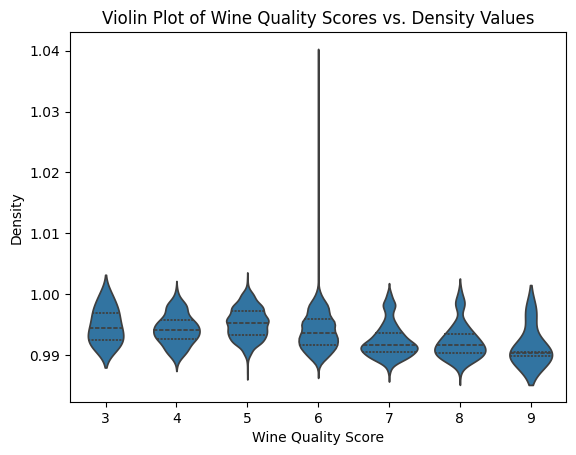

In [145]:
sns.violinplot(data=whitewine_df, x='quality', y='density', inner='quart')
plt.xlabel('Wine Quality Score')
plt.ylabel('Density')
plt.title('Violin Plot of Wine Quality Scores vs. Density Values')

plt.show()

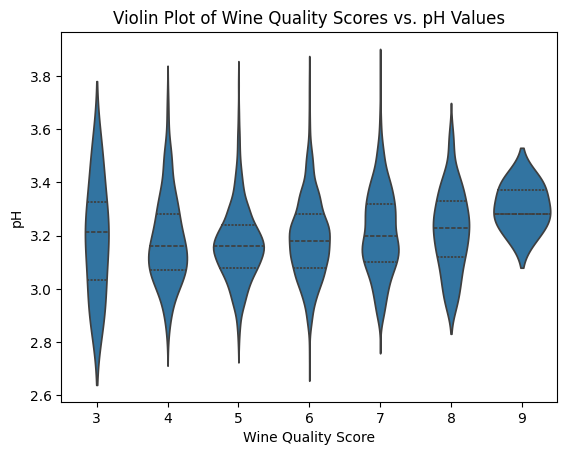

In [146]:
sns.violinplot(data=whitewine_df, x='quality', y='pH', inner='quart')
plt.xlabel('Wine Quality Score')
plt.ylabel('pH')
plt.title('Violin Plot of Wine Quality Scores vs. pH Values')

plt.show()

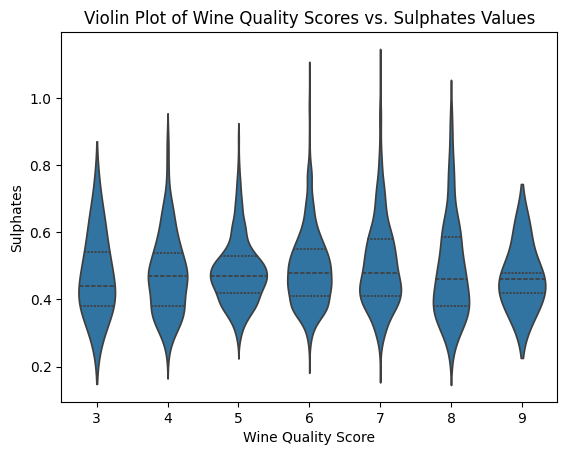

In [147]:
sns.violinplot(data=whitewine_df, x='quality', y='sulphates', inner='quart')
plt.xlabel('Wine Quality Score')
plt.ylabel('Sulphates')
plt.title('Violin Plot of Wine Quality Scores vs. Sulphates Values')

plt.show()

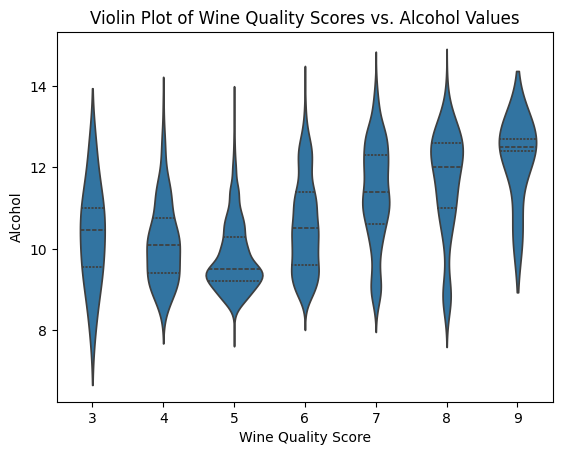

In [148]:
sns.violinplot(data=whitewine_df, x='quality', y='alcohol', inner='quart')
plt.xlabel('Wine Quality Score')
plt.ylabel('Alcohol')
plt.title('Violin Plot of Wine Quality Scores vs. Alcohol Values')

plt.show()



---


*********This is for single feature Linear Regression*********


---



In [149]:
data = pd.read_csv('/content/winequality-white.csv', sep=';')
X = data['alcohol'] # Feature name
y = data['quality']  # Target name


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1) #converting to 2D array
X_test = X_test.values.reshape(-1, 1)   #converting to 2D array

In [151]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print(f'b0 = {model.intercept_}')
print(f'b1 = {model.coef_[0]}')

Mean squared error: 0.6177518759003805
R-squared: 0.20235854927544705
b0 = 2.594634883462978
b1 = 0.3118068153786768


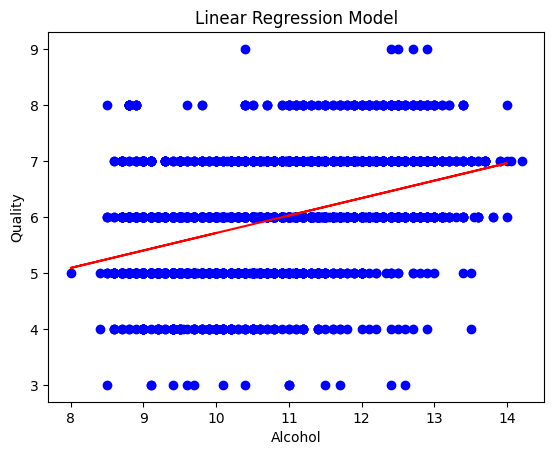

In [152]:
plt.scatter(X_train, y_train,color='blue')
plt.plot(X_test, y_pred,color='red')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Linear Regression Model')

plt.show()



---


***********This is the 2nd part - for multifeature linear regression.***********

---



In [154]:
data = pd.read_csv('/content/winequality-white.csv', sep=';')
X = data[['volatile acidity', 'alcohol', 'density']] #feature names
y = data['quality'] #target name

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [157]:
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print(f'b0 = {model.intercept_}')
print(f'b1 = {model.coef_[0]}')
print(f'b2 = {model.coef_[1]}')
print(f'b3 = {model.coef_[2]}')

Mean squared error: 0.5855587709290658
R-squared: 0.24392629832553359
b0 = -37.49257502316353
b1 = -2.128325298480065
b2 = 0.39908482916666943
b3 = 40.00172502326192
